<center><h1>Sales Data Analysis</h1></center>

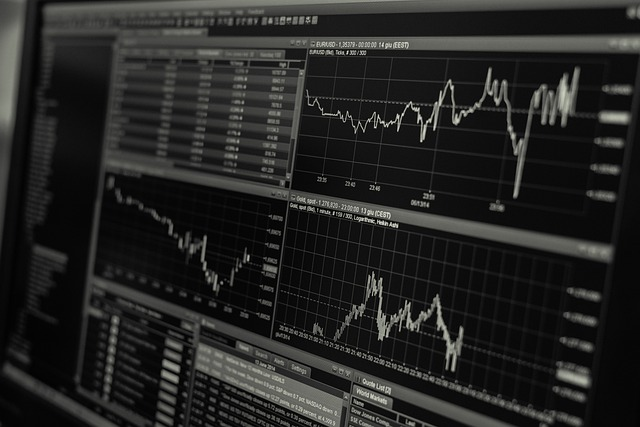

<h3>ABC Private Limited, a retail company, wants to gain insight into its customers purchasing
habits, particularly their spending on different product categories. To do this, they have provided
a summary of the purchase history of a number of high-volume products from the previous
month. This data includes information on the customer demographics, such as age, gender,
marital status, city type, and length of stay in their current city, as well as details on the products
themselves, including product ID and product category.</h3>

<h3>The company is looking to build a model that can predict how much a customer is likely to spend
on a given product, which will enable them to tailor personalized offers to each customer for
different products.</h3>

## Variable Definition

* User_ID--->unique user ID
* Product_ID---->unique product ID
* Gender---->Categorical variable Sex of User (M,F)
* Age----> Age groups (in bins of 10 years)
* Occupation---->Category of Occupation (Data is Masked,Thus only number is provided)
* City_Category----->Category of the City (A,B,C)
* Stay_In_Current_City_Years----->Number of years customer stayed in current city
* Marital_Status-----> Marital Status(0-unmarried, 1-married)
* Product_Category_1----->Product Category (Masked)
* Product_Category_2----->Product may belongs to other category also (Masked)
* Product_Category_3----->Product may belongs to other category also (Masked)
* Purchase----->Purchase Amount (Target Variable)

In [1]:
# importing important libraries
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'Data Science_Questions.docx',
 'LICENSE',
 'Notebook.ipynb',
 'README.md',
 'test.csv',
 'test.csv.zip',
 'train.csv',
 'train.csv.zip']

In [3]:
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

In [96]:
test_sub=pd.read_csv(r'test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


#### Descriptive statistics of the dataset

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,233599.0,1.003029e+06,1726.504968,1000001.0,1001527.0,1003070.0,1004477.0,1006040.0
Occupation,233599.0,8.085407e+00,6.521146,0.0,2.0,7.0,14.0,20.0
Marital_Status,233599.0,4.100702e-01,0.491847,0.0,0.0,0.0,1.0,1.0
Product_Category_1,233599.0,5.276542e+00,3.736380,1.0,1.0,5.0,8.0,18.0
Product_Category_2,161255.0,9.849586e+00,5.094943,2.0,5.0,9.0,15.0,18.0
Product_Category_3,71037.0,1.266945e+01,4.125944,3.0,9.0,14.0,16.0,18.0


#### Missing values in the data

In [10]:
def missing_function(df):
    nul=[]
    c=[]
    b=[]
    for i in df.columns:
        a=(df[i].isnull().sum()/df.shape[0])*100
        nul.append(a)
    for j in range(0,len(nul)):
         if nul[j]>0:
                c.append(df.columns[j])
                b.append(nul[j])
    nul_tab=pd.DataFrame({"Colum_ name":c,
                 "Null_Data_%":b})
    return nul_tab

In [11]:
missing_function(train)

,Colum_ name,Null_Data_%
0,Product_Category_2,31.566643
1,Product_Category_3,69.672659


In [12]:
missing_function(test)

,Colum_ name,Null_Data_%
0,Product_Category_2,30.969311
1,Product_Category_3,69.590195


#### Unique values in the data

In [13]:
def unique_cat(df):
    for i in df.columns:
        print(i)
        print("Total unique categories:" + str(df[i].nunique()))
        print("Unique Categories:" + str(df[i].unique())+ "\n")
        print("________________________________________________________________________________")

In [14]:
unique_cat(train)

User_ID
Total unique categories:5891
Unique Categories:[1000001 1000002 1000003 ... 1004113 1005391 1001529]

________________________________________________________________________________
Product_ID
Total unique categories:3631
Unique Categories:['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

________________________________________________________________________________
Gender
Total unique categories:2
Unique Categories:['F' 'M']

________________________________________________________________________________
Age
Total unique categories:7
Unique Categories:['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

________________________________________________________________________________
Occupation
Total unique categories:21
Unique Categories:[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

________________________________________________________________________________
City_Category
Total unique categories:3
Unique Categories:[

In [15]:
unique_cat(test)

User_ID
Total unique categories:5891
Unique Categories:[1000004 1000009 1000010 ... 1001656 1005796 1001189]

________________________________________________________________________________
Product_ID
Total unique categories:3491
Unique Categories:['P00128942' 'P00113442' 'P00288442' ... 'P00270742' 'P00253842'
 'P00325442']

________________________________________________________________________________
Gender
Total unique categories:2
Unique Categories:['M' 'F']

________________________________________________________________________________
Age
Total unique categories:7
Unique Categories:['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17']

________________________________________________________________________________
Occupation
Total unique categories:21
Unique Categories:[ 7 17  1 15  3  0  8 16  4 12 13 18 11  9  2 20 14 10  6 19  5]

________________________________________________________________________________
City_Category
Total unique categories:3
Unique Categories:[

### Exploratory Data Analysis

#### Univariate Analyasis

In [16]:
from scipy.stats import shapiro
stat, p = shapiro(train["Purchase"])
print("stat=" +str(stat)+"\np="+str(p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.9526435732841492
p=0.0
Probably not Gaussian


* Purchase is not normally distributed

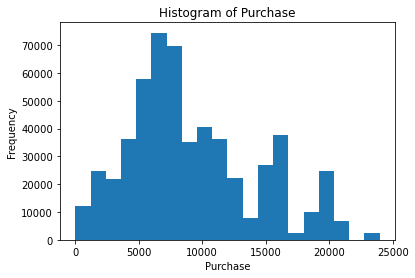

In [17]:
plt.hist(train["Purchase"], bins=20)
plt.title("Histogram of Purchase")
plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.show()

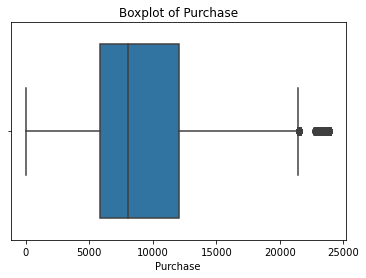

In [18]:
sns.boxplot(train["Purchase"])
plt.title("Boxplot of Purchase")
plt.xlabel("Purchase")
plt.show()

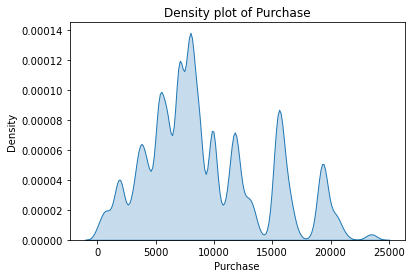

In [19]:
sns.kdeplot(train["Purchase"], shade=True)
plt.title("Density plot of Purchase")
plt.xlabel("Purchase")
plt.ylabel("Density")
plt.show()

In [20]:
def univariate_eda(data, variable):
    
    sns.countplot(data[variable])
    plt.title('Bar plot of ' + variable)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    value_counts = data[variable].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie chart of ' + variable)
    plt.show()

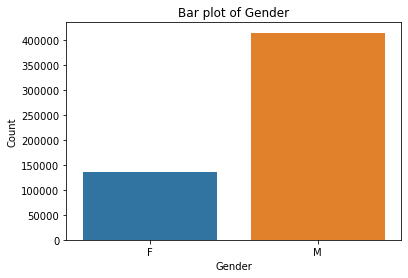

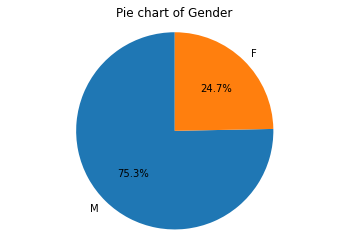

In [21]:
univariate_eda(train,'Gender')

* Buyers consists of more Males than females

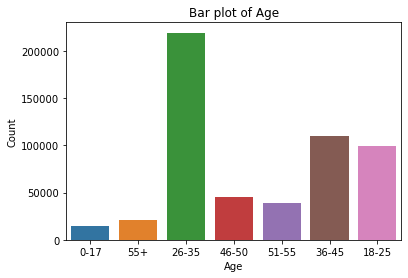

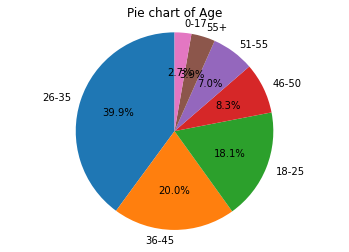

In [22]:
univariate_eda(train,'Age')

* Young adults between 26-35 contibutes most to the purchase of the product

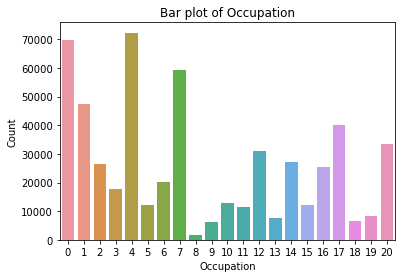

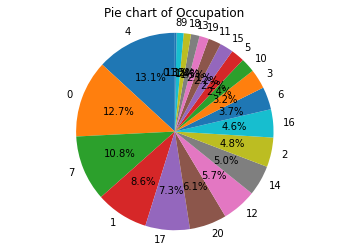

In [23]:
univariate_eda(train,'Occupation')

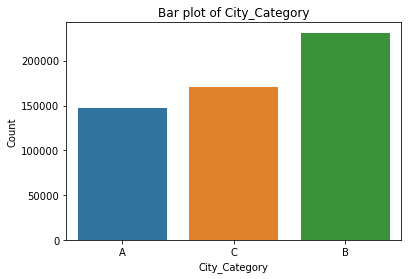

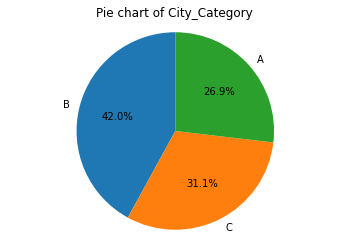

In [24]:
univariate_eda(train,'City_Category')

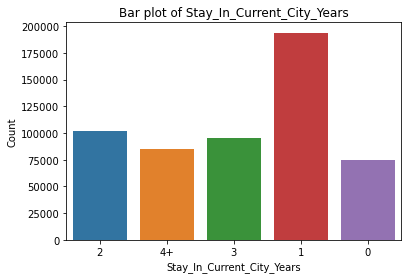

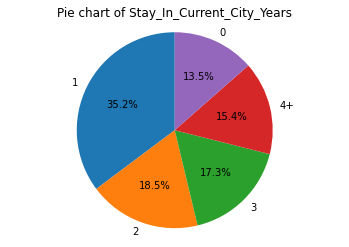

In [25]:
univariate_eda(train,'Stay_In_Current_City_Years')

* Customers recently settled in the city with about 1 year being there buys more products

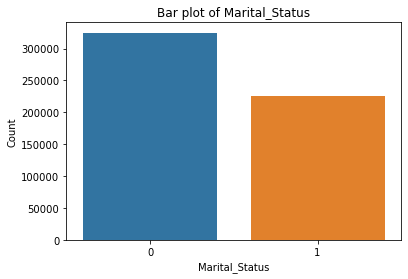

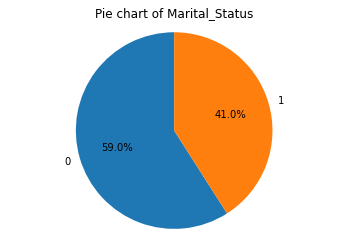

In [26]:
univariate_eda(train,'Marital_Status')

* Unmarried people buys more products

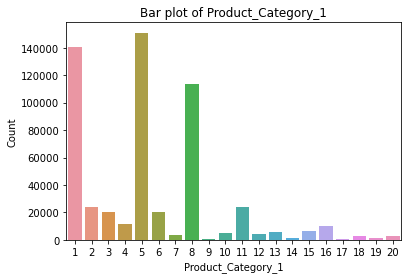

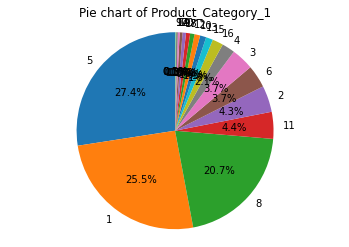

In [27]:
univariate_eda(train,'Product_Category_1')

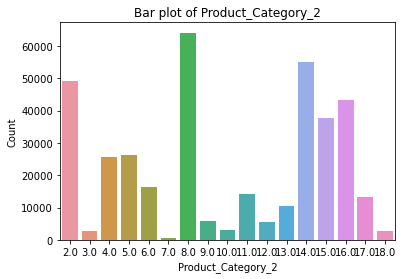

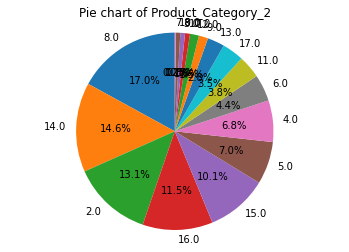

In [28]:
univariate_eda(train,'Product_Category_2')

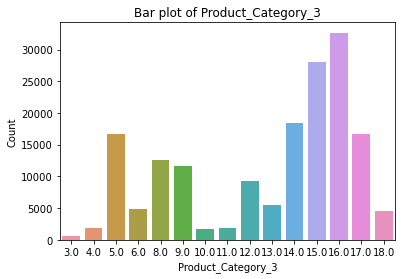

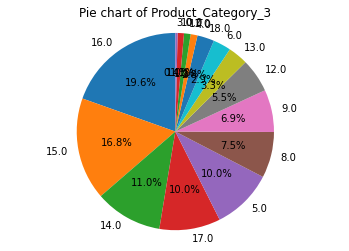

In [29]:
univariate_eda(train,'Product_Category_3')

#### Purchase Distribution with respect to other variables in the dataset.

In [30]:
def purchase_distribution(df, purchase, ob_variable):
    plot_type="Density"
    sns.kdeplot(data=df, x=purchase, hue=ob_variable, fill=True)
    plt.title(f"{plot_type.title()} plot of {purchase} by {ob_variable}")
    plt.xlabel(purchase)
    plt.ylabel('Count' if plot_type == 'hist' else 'Density')
    plt.show()

In [31]:
# 'Purchase' is to 'Gender' distribution 

m=train[train["Gender"]=="M"]
f=train[train["Gender"]=="F"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(m['Purchase'], f['Purchase'])
print("stat=" +str(stat)+"\np="+str(p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=30179738109.5
p=0.0
Probably different distributions


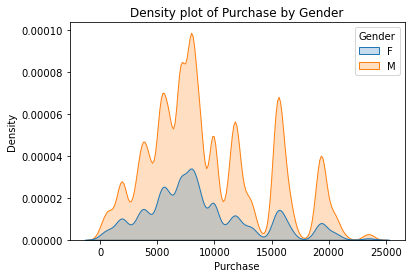

In [32]:
purchase_distribution(train,'Purchase','Gender')

In [33]:
# 'Purchase' is to 'Age' distribution 

a=train[train["Age"]=="0-17"]
b=train[train["Age"]=="18-25"]
c=train[train["Age"]=="26-35"]
d=train[train["Age"]=="36-45"]
e=train[train["Age"]=="46-50"]
g=train[train["Age"]=="51-55"]
h=train[train["Age"]=="55+"]

from scipy.stats import kruskal
stat, p = kruskal(a['Purchase'], b['Purchase'],c['Purchase'],d['Purchase'],e['Purchase'],g['Purchase'],h['Purchase'])
print("stat=" +str(stat)+"\np="+str(p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=315.65242682849174
p=3.612251655399266e-65
Probably different distributions


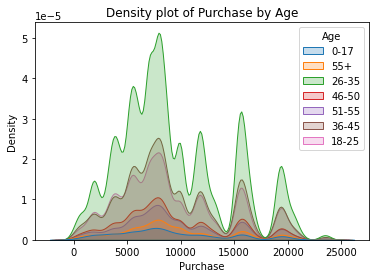

In [34]:
purchase_distribution(train,'Purchase','Age')

In [35]:
# 'Purchase' is to 'City_Category' distribution 

a=train[train["City_Category"]=='A']
b=train[train["City_Category"]=='B']
c=train[train["City_Category"]=='C']

from scipy.stats import kruskal
stat, p = kruskal(a['Purchase'], b['Purchase'],c['Purchase'])
print("stat=" +str(stat)+"\np="+str(p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2303.7127322648357
p=0.0
Probably different distributions


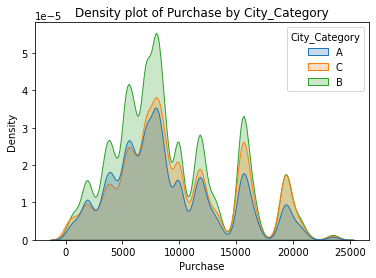

In [36]:
purchase_distribution(train,'Purchase','City_Category')

In [37]:
# 'Purchase' is to 'Stay_In_Current_City_Years' distribution 

a=train[train["Stay_In_Current_City_Years"]=='1']
b=train[train["Stay_In_Current_City_Years"]=='2']
c=train[train["Stay_In_Current_City_Years"]=='3']
d=train[train["Stay_In_Current_City_Years"]=='4+']
e=train[train["Stay_In_Current_City_Years"]=='0']

from scipy.stats import kruskal
stat, p = kruskal(a['Purchase'], b['Purchase'],c['Purchase'],d['Purchase'],e['Purchase'])
print("stat=" +str(stat)+"\np="+str(p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=34.09745117080573
p=7.116707175904518e-07
Probably different distributions


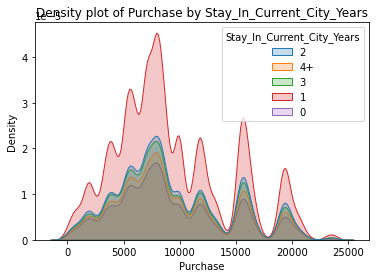

In [38]:
purchase_distribution(train,'Purchase','Stay_In_Current_City_Years')

In [39]:
# 'Purchase' is to 'Marital_Status' distribution 

m=train[train["Marital_Status"]==1]
um=train[train["Marital_Status"]==0]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(m['Purchase'], um['Purchase'])
print("stat=" +str(stat)+"\np="+str(p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=36634842106.5
p=0.40832344942797494
Probably the same distribution


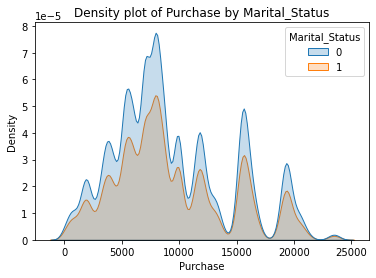

In [40]:
purchase_distribution(train,'Purchase','Marital_Status')

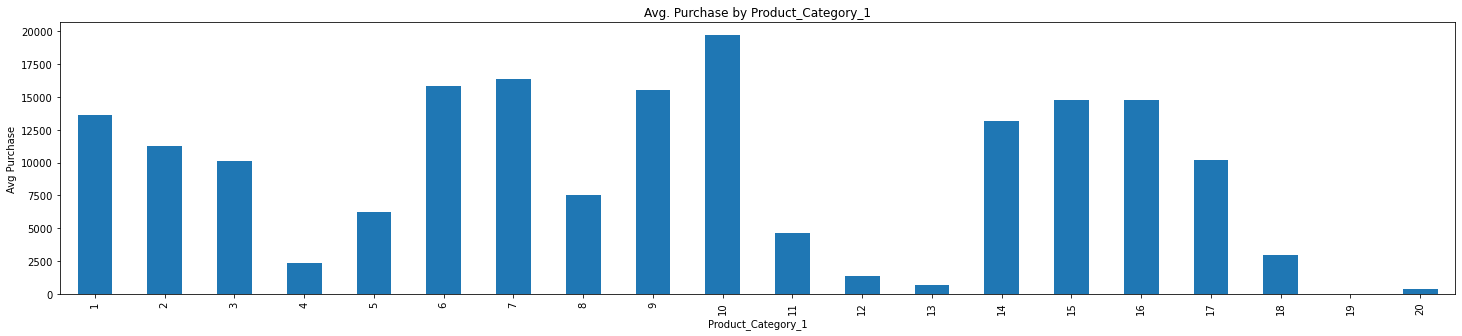

In [41]:
plt.figure(figsize=(25,5))
train.groupby(["Product_Category_1"])["Purchase"].mean().plot(kind='bar')
plt.xlabel("Product_Category_1")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Product_Category_1")
plt.show()

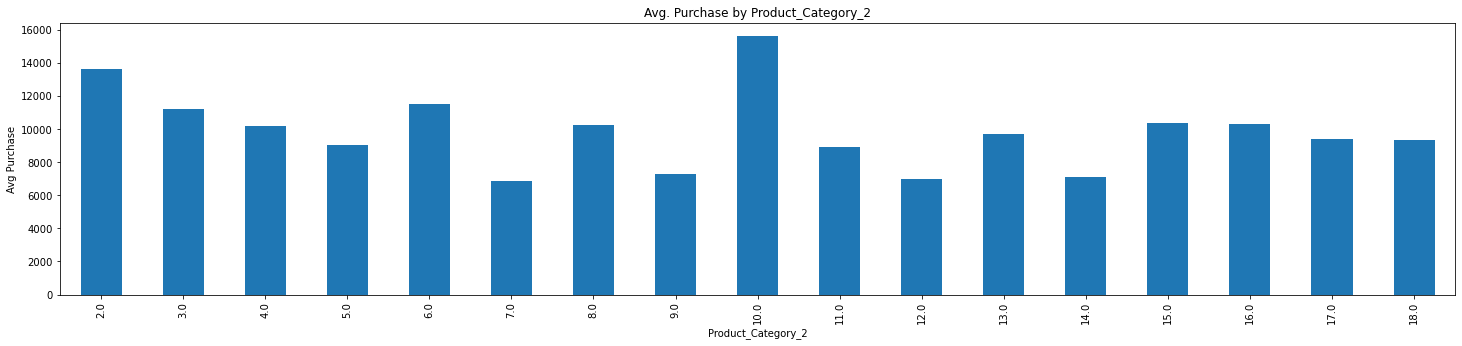

In [42]:
plt.figure(figsize=(25,5))
train.groupby(["Product_Category_2"])["Purchase"].mean().plot(kind='bar')
plt.xlabel("Product_Category_2")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Product_Category_2")
plt.show()

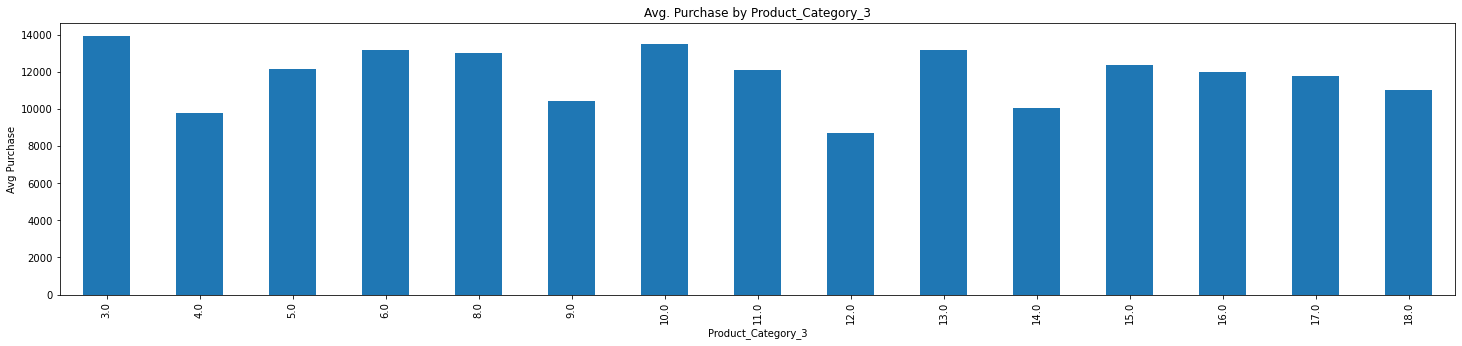

In [43]:
plt.figure(figsize=(25,5))
train.groupby(["Product_Category_3"])["Purchase"].mean().plot(kind='bar')
plt.xlabel("Product_Category_3")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Product_Category_3")
plt.show()

#### Checking for outliers


* since we have only one numerical variable--->"Purchase"
* we can observe a few numbers of outliers above the upper bound
* Using tukey method capping the data

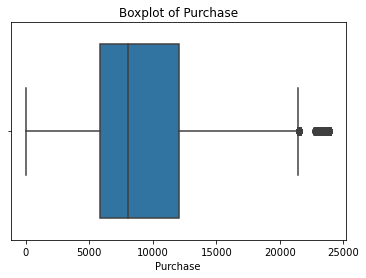

In [44]:
sns.boxplot(train["Purchase"])
plt.title("Boxplot of Purchase")
plt.xlabel("Purchase")
plt.show()

In [45]:
q1 = train["Purchase"].quantile(0.25)
q3 = train["Purchase"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
train1 = train.copy()
train1["Purchase"] = np.where(train1["Purchase"] < lower_bound, lower_bound, train1["Purchase"])
train1["Purchase"] = np.where(train1["Purchase"] > upper_bound, upper_bound, train1["Purchase"])

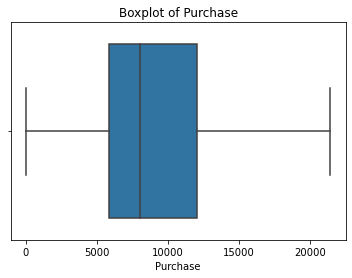

In [46]:
sns.boxplot(train1["Purchase"])
plt.title("Boxplot of Purchase")
plt.xlabel("Purchase")
plt.show()

#### Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

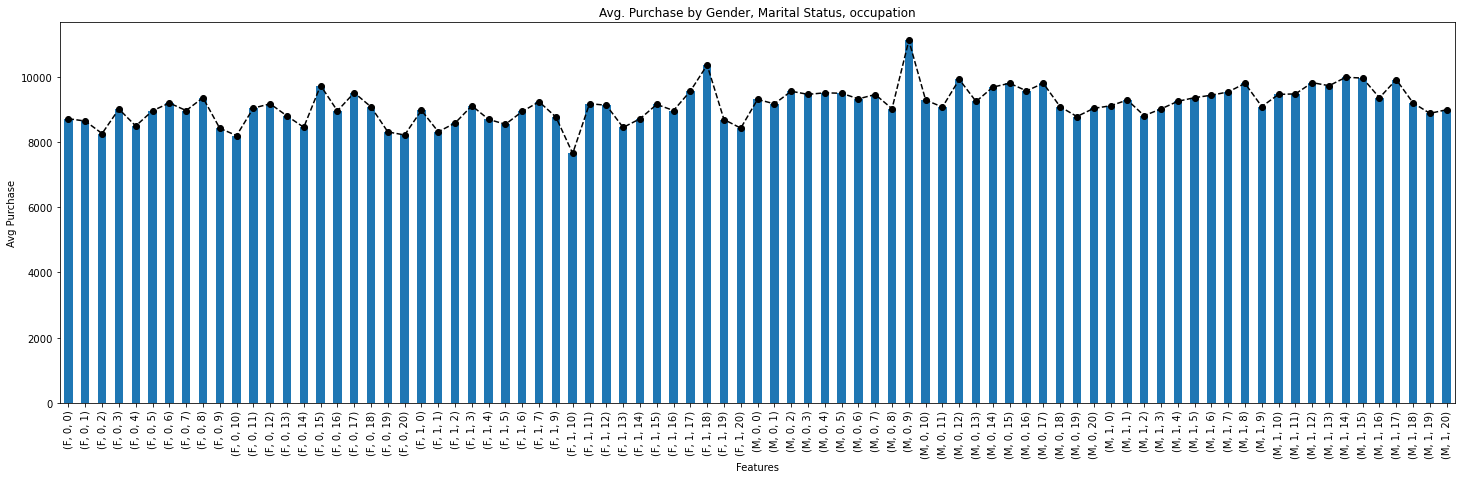

In [47]:
plt.figure(figsize=(25,7))
train.groupby(["Gender", "Marital_Status", "Occupation"])["Purchase"].mean().plot(kind='bar')
train.groupby(["Gender", "Marital_Status", "Occupation"])["Purchase"].mean().plot(color=['black'],marker="o",linestyle='dashed')
plt.xlabel("Features")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Gender, Marital Status, occupation")
plt.show()

* Occupation and marital status is directly ralated to purchase as we can observe unmarried male with occupation labeled 9 has highest avg purchases
* but married female with occupation labeled 10 has the least avg purchases

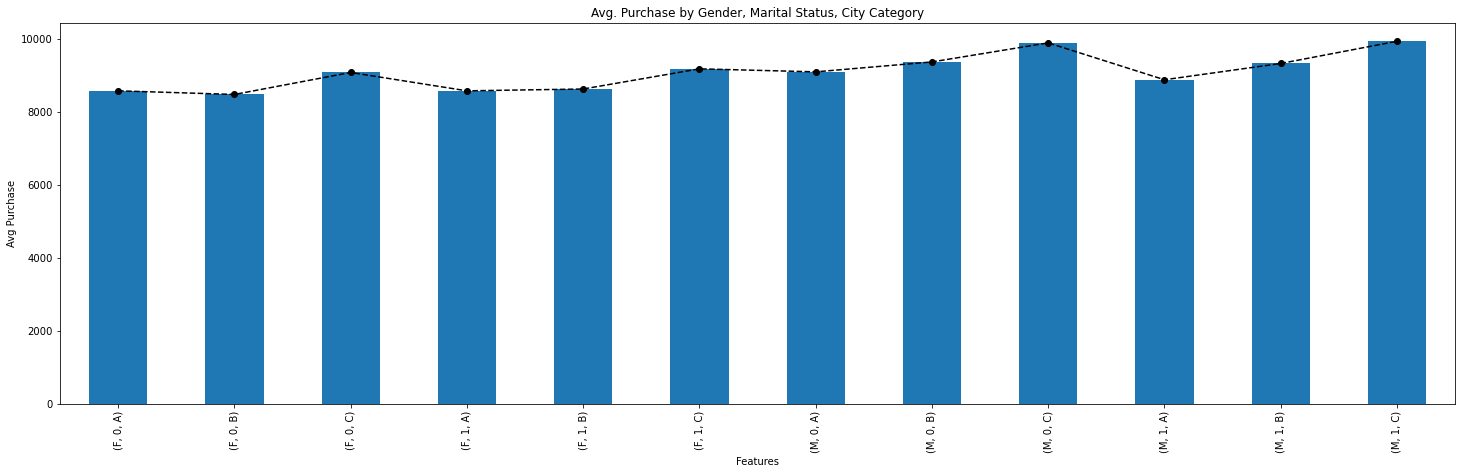

In [48]:
plt.figure(figsize=(25,7))
train.groupby(["Gender", "Marital_Status", "City_Category"])["Purchase"].mean().plot(kind='bar')
train.groupby(["Gender", "Marital_Status", "City_Category"])["Purchase"].mean().plot(color=['black'],marker="o",linestyle='dashed')
plt.xlabel("Features")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Gender, Marital Status, City Category")
plt.show()

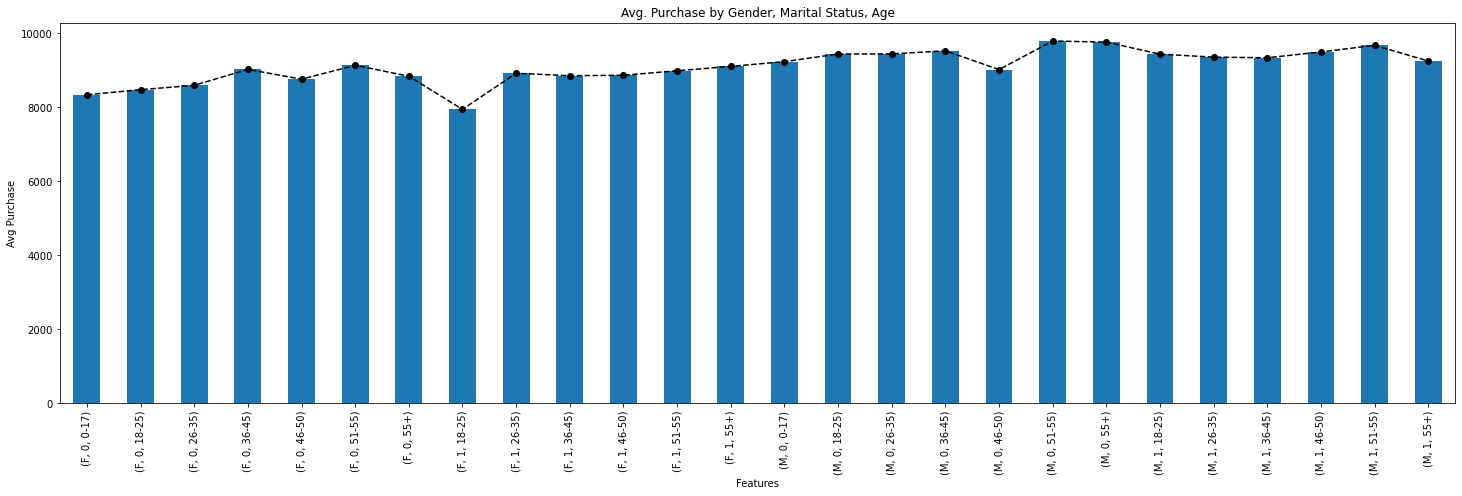

In [49]:
plt.figure(figsize=(25,7))
train.groupby(["Gender", "Marital_Status", "Age"])["Purchase"].mean().plot(kind='bar')
train.groupby(["Gender", "Marital_Status", "Age"])["Purchase"].mean().plot(color=['black'],marker="o",linestyle='dashed')
plt.xlabel("Features")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Gender, Marital Status, Age")
plt.show()

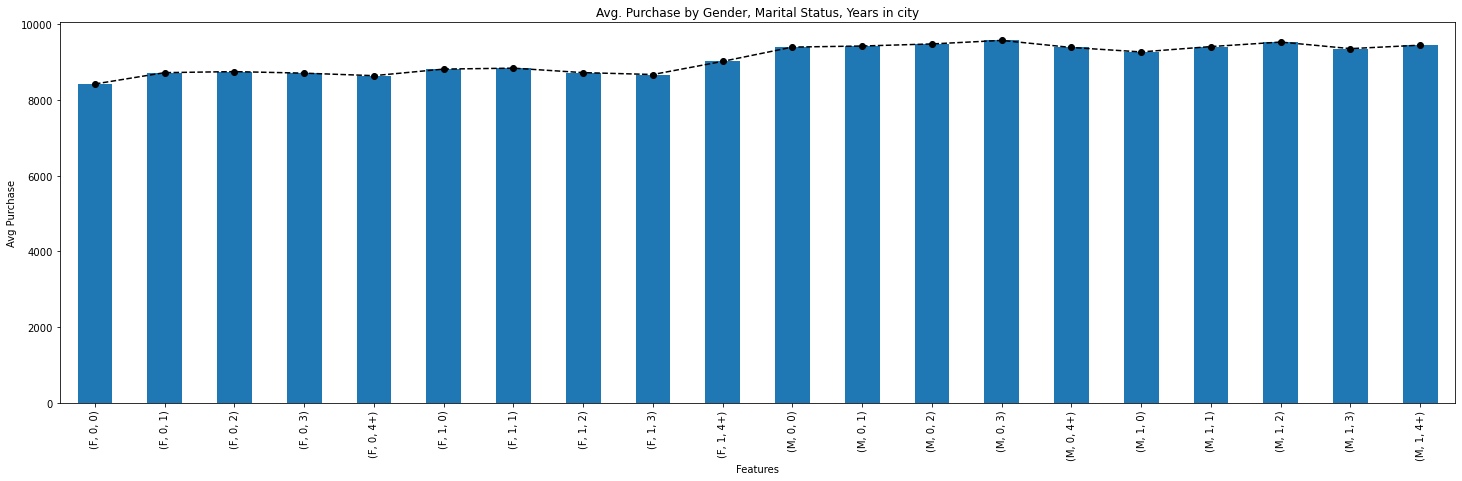

In [50]:
plt.figure(figsize=(25,7))
train.groupby(["Gender", "Marital_Status", "Stay_In_Current_City_Years"])["Purchase"].mean().plot(kind='bar')
train.groupby(["Gender", "Marital_Status", "Stay_In_Current_City_Years"])["Purchase"].mean().plot(color=['black'],marker="o",linestyle='dashed')
plt.xlabel("Features")
plt.ylabel("Avg Purchase")
plt.xticks(rotation=90)
plt.title("Avg. Purchase by Gender, Marital Status, Years in city")
plt.show()

#### Missing value treatment  and  fill nan values

* as per obserations the product category purchase in category 2(numerically) is higher then category 1 and is smaller then category 3

In [51]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_3'] - 1)
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_1'] + 1)
train['Product_Category_3'] = train['Product_Category_3'].fillna(1 + train['Product_Category_2'])

In [52]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_3'] - 1)
test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_1'] + 1)
test['Product_Category_3'] = test['Product_Category_3'].fillna(1 + test['Product_Category_2'])

In [53]:
missing_function(train)

,Colum_ name,Null_Data_%


In [54]:
missing_function(test)

,Colum_ name,Null_Data_%


In [55]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4.0,5.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,13.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,15.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,10.0,7969


#### Convert categorical data into integer using map function (e.g "Gender" column)

In [56]:
# determined weightage based on purchasing behaviour 
gender = {'F': 0, 'M': 1}
city_category = {'A':1,  'C':2, 'B': 3}
stay_in_current_city_years = {'0': 1,'4+': 2,'3': 3,'2': 4,'1': 5}

In [57]:
train['Gender'] = train['Gender'].map(gender)
test['Gender'] = test['Gender'].map(gender)

In [58]:
train['City_Category'] = train['City_Category'].map(city_category)
test['City_Category'] = test['City_Category'].map(city_category)

In [59]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map(stay_in_current_city_years)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map(stay_in_current_city_years)

#### map range variables into integers (e.g 'Age' column)

In [60]:
age = {'0-17': 1, '55+': 2,'51-55': 3 ,'46-50': 4,'18-25': 5,'36-45': 6,'26-35': 7}
train['Age'] = train['Age'].map(age)
test['Age'] = test['Age'].map(age)

#### Drop unnecessary fields

In [61]:
train.drop(columns=["User_ID"],inplace=True)
test.drop(columns=["User_ID"],inplace=True)

#### Rename columns

In [62]:
train.rename(columns={"Stay_In_Current_City_Years":"Duration_of_Stay"},inplace=True)
test.rename(columns={"Stay_In_Current_City_Years":"Duration_of_Stay"},inplace=True)

#### Label Encoding Product_ID

In [63]:
from sklearn.preprocessing import LabelEncoder
Product_id = list(set(pd.unique(test['Product_ID'])) - set(pd.unique(train['Product_ID'])))

le = LabelEncoder()
train['Product_ID'] = le.fit_transform(train['Product_ID'])
test.loc[test['Product_ID'].isin(Product_id), 'Product_ID'] = -1
Product_id.append(-1)

test.loc[~test['Product_ID'].isin(Product_id), 'Product_ID'] = le.transform(test.loc[~test['Product_ID'].isin(Product_id), 'Product_ID'])

test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Duration_of_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1196,1,4,7,3,4,1,1,11.0,12.0
1,1043,1,7,17,2,1,0,3,5.0,6.0
2,2764,0,6,1,3,2,1,5,14.0,15.0
3,1358,0,6,1,3,2,1,4,9.0,10.0
4,529,0,7,1,2,5,0,4,5.0,12.0


#### MinMaxScaling Since in Data not all columns are in same scale

In [64]:
testData = test.copy()

In [65]:
x=train.drop(columns=["Purchase"])
y=train["Purchase"]

In [66]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
x1=ms.fit_transform(x)
test1=ms.fit_transform(test)

In [67]:
x=pd.DataFrame(x1,columns=x.columns)
test=pd.DataFrame(test1,columns=test.columns)

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
from xgboost import XGBRegressor

In [80]:
xgb=XGBRegressor()

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [81]:
print("Train Score:",xgb.score(x_train,y_train))
print("Test Score:",xgb.score(x_test,y_test))

Train Score: 0.7271810883152201
Test Score: 0.7196550434824103


In [84]:
pred_train_xgb=xgb.predict(x_train)
pred_test_xgb=xgb.predict(x_test)
print("Train MSE", np.mean((pred_train_xgb-y_train)**(2)))               # mean squared error
print("Train RMSE", np.sqrt(np.mean((pred_train_xgb-y_train)**(2))))     # root mean squared error
print("Train MAE",  np.mean(np.abs(pred_train_xgb-y_train)))             # mean absolute error
print("Train MAPE",  np.mean(np.abs((pred_train_xgb-y_train)/y_train)))  # mean absolute percentage error

print("\nTest MSE", np.mean((pred_test_xgb-y_test)**(2)))               # mean squared error
print("Test RMSE", np.sqrt(np.mean((pred_test_xgb-y_test)**(2))))     # root mean squared error
print("Test MAE",  np.mean(np.abs(pred_test_xgb-y_test)))             # mean absolute error
print("Test MAPE",  np.mean(np.abs((pred_test_xgb-y_test)/y_test)))  # mean absolute percentage error

Train MSE 6878572.79548566
Train RMSE 2622.7033373002105
Train MAE 1963.3900360922028
Train MAPE 0.32205593104134683

Test MSE 7085307.300873997
Test RMSE 2661.824055206128
Test MAE 1986.2324158241463
Test MAPE 0.3264561032708237


In [82]:
xgb1 = XGBRegressor(max_depth = 10, n_estimators = 600, subsample = 0.8, colsample_bytree = 0.8, min_child_weight = 20)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=20,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [87]:
print("Train Score:",xgb1.score(x_train,y_train))
print("Test Score:",xgb1.score(x_test,y_test))

Train Score: 0.8456605345542574
Test Score: 0.7066934566226142


In [88]:
pred_train_xgb1=xgb1.predict(x_train)
pred_test_xgb1=xgb1.predict(x_test)
print("Train MSE", np.mean((pred_train_xgb1-y_train)**(2)))               # mean squared error
print("Train RMSE", np.sqrt(np.mean((pred_train_xgb1-y_train)**(2))))     # root mean squared error
print("Train MAE",  np.mean(np.abs(pred_train_xgb1-y_train)))             # mean absolute error
print("Train MAPE",  np.mean(np.abs((pred_train_xgb1-y_train)/y_train)))  # mean absolute percentage error

print("\nTest MSE", np.mean((pred_test_xgb1-y_test)**(2)))               # mean squared error
print("Test RMSE", np.sqrt(np.mean((pred_test_xgb1-y_test)**(2))))     # root mean squared error
print("Test MAE",  np.mean(np.abs(pred_test_xgb1-y_test)))             # mean absolute error
print("Test MAPE",  np.mean(np.abs((pred_test_xgb1-y_test)/y_test)))  # mean absolute percentage error

Train MSE 3891355.0447397865
Train RMSE 1972.6517798992772
Train MAE 1465.8117102617737
Train MAPE 0.25238120455430324

Test MSE 7412892.384441814
Test RMSE 2722.662737917022
Test MAE 1992.9314179757205
Test MAPE 0.3382085464473806


In [74]:
xgb2 = XGBRegressor(max_depth = 15, n_estimators = 200, subsample = 0.8, colsample_bytree = 0.8, min_child_weight = 20)
xgb2.fit(x_train,y_train)
print("Train Score:",xgb2.score(x_train,y_train))
print("Test Score:",xgb2.score(x_test,y_test))

Train Score: 0.8813835113631378
Test Score: 0.6901825621537976


In [89]:
pred_train_xgb2=xgb2.predict(x_train)
pred_test_xgb2=xgb2.predict(x_test)
print("Train MSE", np.mean((pred_train_xgb2-y_train)**(2)))               # mean squared error
print("Train RMSE", np.sqrt(np.mean((pred_train_xgb2-y_train)**(2))))     # root mean squared error
print("Train MAE",  np.mean(np.abs(pred_train_xgb2-y_train)))             # mean absolute error
print("Train MAPE",  np.mean(np.abs((pred_train_xgb2-y_train)/y_train)))  # mean absolute percentage error

print("\nTest MSE", np.mean((pred_test_xgb2-y_test)**(2)))               # mean squared error
print("Test RMSE", np.sqrt(np.mean((pred_test_xgb2-y_test)**(2))))     # root mean squared error
print("Test MAE",  np.mean(np.abs(pred_test_xgb2-y_test)))             # mean absolute error
print("Test MAPE",  np.mean(np.abs((pred_test_xgb2-y_test)/y_test)))  # mean absolute percentage error

Train MSE 2990672.995486084
Train RMSE 1729.3562372993263
Train MAE 1275.3550352087373
Train MAPE 0.21764341798625475

Test MSE 7830181.0083465595
Test RMSE 2798.246059292599
Test MAE 2045.625158743775
Test MAPE 0.33977300737116917


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
print("Train_score:",rfr.score(x_train,y_train))
print("Test_score:",rfr.score(x_test,y_test))

Train_score: 0.934318902904156
Test_score: 0.6742963530065698


In [90]:
pred_train_rfr=rfr.predict(x_train)
pred_test_rfr=rfr.predict(x_test)
print("Train MSE", np.mean((pred_train_rfr-y_train)**(2)))               # mean squared error
print("Train RMSE", np.sqrt(np.mean((pred_train_rfr-y_train)**(2))))     # root mean squared error
print("Train MAE",  np.mean(np.abs(pred_train_rfr-y_train)))             # mean absolute error
print("Train MAPE",  np.mean(np.abs((pred_train_rfr-y_train)/y_train)))  # mean absolute percentage error

print("\nTest MSE", np.mean((pred_test_rfr-y_test)**(2)))               # mean squared error
print("Test RMSE", np.sqrt(np.mean((pred_test_rfr-y_test)**(2))))     # root mean squared error
print("Test MAE",  np.mean(np.abs(pred_test_rfr-y_test)))             # mean absolute error
print("Test MAPE",  np.mean(np.abs((pred_test_rfr-y_test)/y_test)))  # mean absolute percentage error

Train MSE 1656014.9913028285
Train RMSE 1286.862460134271
Train MAE 890.0951084626192
Train MAPE 0.1289945037874586

Test MSE 8231681.6276255315
Test RMSE 2869.090731856616
Test MAE 2101.68945998929
Test MAPE 0.3101604512419604


In [78]:
rfr1=RandomForestRegressor(n_estimators=150,max_depth=10,
                          min_samples_split=5,min_samples_leaf=3,
                          max_features="log2",n_jobs=-1,random_state=1,verbose=0)
rfr1.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=3,
                      min_samples_split=5, n_estimators=150, n_jobs=-1,
                      random_state=1)

In [79]:
print("Train_score:",rfr1.score(x_train,y_train))
print("Test_score:",rfr1.score(x_test,y_test))

Train_score: 0.6141249778217732
Test_score: 0.6127090896248202


In [91]:
pred_train_rfr1=rfr1.predict(x_train)
pred_test_rfr1=rfr1.predict(x_test)
print("Train MSE", np.mean((pred_train_rfr1-y_train)**(2)))               # mean squared error
print("Train RMSE", np.sqrt(np.mean((pred_train_rfr1-y_train)**(2))))     # root mean squared error
print("Train MAE",  np.mean(np.abs(pred_train_rfr1-y_train)))             # mean absolute error
print("Train MAPE",  np.mean(np.abs((pred_train_rfr1-y_train)/y_train)))  # mean absolute percentage error

print("\nTest MSE", np.mean((pred_test_rfr1-y_test)**(2)))               # mean squared error
print("Test RMSE", np.sqrt(np.mean((pred_test_rfr1-y_test)**(2))))     # root mean squared error
print("Test MAE",  np.mean(np.abs(pred_test_rfr1-y_test)))             # mean absolute error
print("Test MAPE",  np.mean(np.abs((pred_test_rfr1-y_test)/y_test)))  # mean absolute percentage error

Train MSE 9729052.18930758
Train RMSE 3119.1428613174453
Train MAE 2346.192841217885
Train MAPE 0.4380613701170755

Test MSE 9788209.315157231
Test RMSE 3128.6114036673252
Test MAE 2351.4110257735965
Test MAPE 0.4395004714897125


In [92]:
Model=["XGB","XGB1","XGB2","Rand_f","Rand_f1"]
Train_Score=[xgb.score(x_train,y_train),xgb1.score(x_train,y_train),xgb2.score(x_train,y_train),rfr.score(x_train,y_train),rfr1.score(x_train,y_train)]
Test_Score=[xgb.score(x_test,y_test),xgb1.score(x_test,y_test),xgb2.score(x_test,y_test),rfr.score(x_test,y_test),rfr1.score(x_test,y_test)]
Train_RMSE=[np.sqrt(np.mean((pred_train_xgb-y_train)**(2))),np.sqrt(np.mean((pred_train_xgb1-y_train)**(2))),np.sqrt(np.mean((pred_train_xgb2-y_train)**(2))),np.sqrt(np.mean((pred_train_rfr-y_train)**(2))),np.sqrt(np.mean((pred_train_rfr1-y_train)**(2)))]
Test_RMSE=[np.sqrt(np.mean((pred_test_xgb-y_test)**(2))),np.sqrt(np.mean((pred_test_xgb1-y_test)**(2))),np.sqrt(np.mean((pred_test_xgb2-y_test)**(2))),np.sqrt(np.mean((pred_test_rfr-y_test)**(2))),np.sqrt(np.mean((pred_test_rfr1-y_test)**(2)))]

Model_eval=pd.DataFrame({"Model":Model,"Train Score":Train_Score,"Test Score":Test_Score,"Train RMSE":Train_RMSE,"Test RMSE":Test_RMSE})
Model_eval

,Model,Train Score,Test Score,Train RMSE,Test RMSE
0,XGB,0.727181,0.719655,2622.703337,2661.824055
1,XGB1,0.845661,0.706693,1972.651780,2722.662738
2,XGB2,0.881384,0.690183,1729.356237,2798.246059
3,Rand_f,0.934319,0.674296,1286.862460,2869.090732
4,Rand_f1,0.614125,0.612709,3119.142861,3128.611404


* XGB Performs best with ~2600

In [99]:
yPreds = xgb.predict(test)
test_sub['Purchase'] = yPreds
sub = test_sub[['User_ID', 'Product_ID', 'Purchase']]

sub.columns = ['User_ID', 'Product_ID', 'Purchase']
sub.to_csv('submission.csv', index = False)
sub.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11357.097656
1,1000009,P00113442,12086.033203
2,1000010,P00288442,6224.083984
3,1000010,P00145342,3161.763672
4,1000011,P00053842,2762.010254
